In [ ]:
pip install pycaret[full]

In [ ]:
pip install interpret-community

In [35]:
#Importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.regression import *
from google.colab import files

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

In [2]:
uploaded = files.upload()

Saving data.xlsx to data.xlsx


In [28]:
df= pd.read_excel('data.xlsx',sheet_name='Sheet6')
df=df.drop(['Isc','schw 1', 'schw 2','schw 3', 'schw 4', 'schw 5', 'schw 6','Sherer_1',
    'Sherer_2',
    'Sherer_3',
    'Sherer_4',
    'Sherer_5',
    'Sherer_6'], axis=1)

In [ ]:
xrd=['2-theta 1','2-theta 2','2-theta 3','2-theta 4','2-theta 5','2-theta 6'
    ,
     'FWHM 1','FWHM 2','FWHM 3','FWHM 4','FWHM 5','FWHM 6'
      ,
         'Intensity 1','Intensity 2','Intensity 3','Intensity 4','Intensity 5','Intensity 6'
       ,
      'relative_intensity 1','relative_intensity 2','relative_intensity 3','relative_intensity 4','relative_intensity 5','relative_intensity 6'
      ,
      'Dislocation_Density_1','Dislocation_Density_2','Dislocation_Density_3','Dislocation_Density_4','Dislocation_Density_5','Dislocation_Density_6'
     ]


pl=[ 'PL_amplitude_peak1','PL_amplitude_peak2',

    'PL_fwhm_peak1','PL_fwhm_peak2',

    'PL_peak_positions_peak1','PL_peak_positions_peak2',

    'PL_relative_amplitude_peak1','PL_relative_amplitude_peak2',

    'Bandgap Energy (eV)']


uv=['Urbach energy (meV)']


In [ ]:
df.columns

#Pycaret

##XRD

In [68]:
xrd=df[['DROP', 'FF','2-theta 1','2-theta 2','2-theta 3','2-theta 4','2-theta 5','2-theta 6'
    ,
     'FWHM 1','FWHM 2','FWHM 3','FWHM 4','FWHM 5','FWHM 6'
      ,
         'Intensity 1','Intensity 2','Intensity 3','Intensity 4','Intensity 5','Intensity 6'
       ,
      'relative_intensity 1','relative_intensity 2','relative_intensity 3','relative_intensity 4','relative_intensity 5','relative_intensity 6'
      ,
      'Dislocation_Density_1','Dislocation_Density_2','Dislocation_Density_3','Dislocation_Density_4','Dislocation_Density_5','Dislocation_Density_6'
     ]]


reg = setup(data=xrd , target = 'FF' ,normalize=True ,  train_size=0.8,fold=3,session_id=1543)

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 32)"
4,Transformed data shape,"(27, 32)"
5,Transformed train set shape,"(21, 32)"
6,Transformed test set shape,"(6, 32)"
7,Numeric features,31
8,Preprocess,True
9,Imputation type,simple


In [69]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4256,0.3001,0.5479,0.9571,0.0118,0.0096,0.0900
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.0700
rf,Random Forest Regressor,0.9065,1.2302,1.1092,0.8242,0.0263,0.0218,0.2100
ada,AdaBoost Regressor,1.2121,1.5481,1.2442,0.7787,0.0278,0.0280,0.0900
ridge,Ridge Regression,1.2435,2.2176,1.4892,0.6831,0.0341,0.0292,0.0300
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0200
et,Extra Trees Regressor,1.4515,2.3646,1.5377,0.6620,0.0356,0.0342,0.1300
huber,Huber Regressor,1.4011,2.7382,1.6548,0.6087,0.0374,0.0326,0.0500
omp,Orthogonal Matching Pursuit,1.3837,2.7603,1.6614,0.6055,0.0382,0.0324,0.0400


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [70]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4256,0.3001,0.5479,0.9571,0.0118,0.0096
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

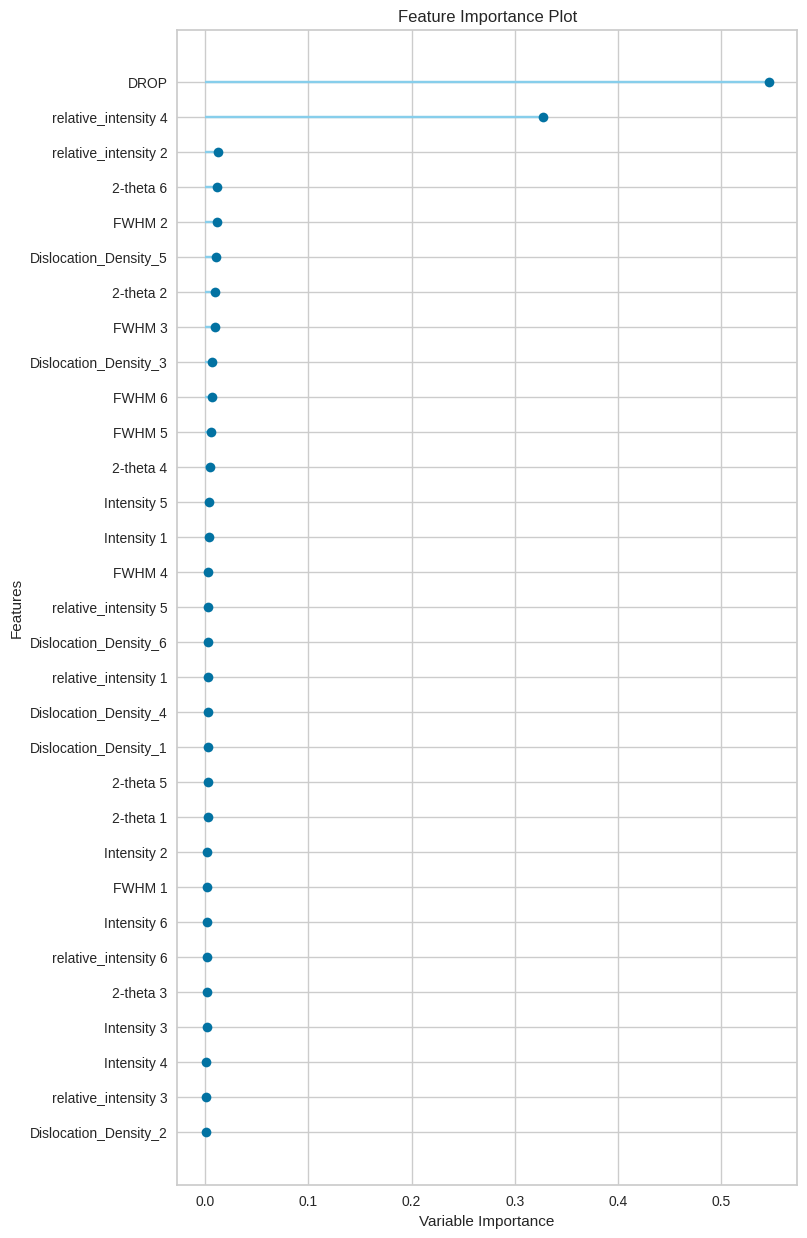

In [71]:
plot_model(gbr, plot ='feature_all')

##PL

In [64]:
pl=df[[ 'PL_amplitude_peak1','PL_amplitude_peak2',

    'PL_fwhm_peak1','PL_fwhm_peak2',

    'PL_peak_positions_peak1','PL_peak_positions_peak2',

    'PL_relative_amplitude_peak1','PL_relative_amplitude_peak2',

    'Bandgap Energy (eV)','FF','DROP'] ]


reg = setup(data=pl , target = 'FF' ,normalize=True ,  train_size=0.8,fold=3,session_id=1543)

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 11)"
4,Transformed data shape,"(27, 11)"
5,Transformed train set shape,"(21, 11)"
6,Transformed test set shape,"(6, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [65]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4498,0.3773,0.6142,0.9461,0.0132,0.0102,0.1100
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0200
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.5900
rf,Random Forest Regressor,1.0652,1.3944,1.1808,0.8007,0.0278,0.0255,0.2000
ada,AdaBoost Regressor,1.3232,1.8426,1.3574,0.7367,0.0306,0.0308,0.1700
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0300
lar,Least Angle Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0200
ridge,Ridge Regression,1.3157,2.3819,1.5433,0.6596,0.0355,0.0310,0.0300
et,Extra Trees Regressor,1.4636,2.5035,1.5823,0.6422,0.0364,0.0344,0.2000
huber,Huber Regressor,1.4011,2.7382,1.6548,0.6087,0.0374,0.0326,0.0300


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [66]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4498,0.3773,0.6142,0.9461,0.0132,0.0102
Train,0.1081,0.0166,0.1289,0.9968,0.0029,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

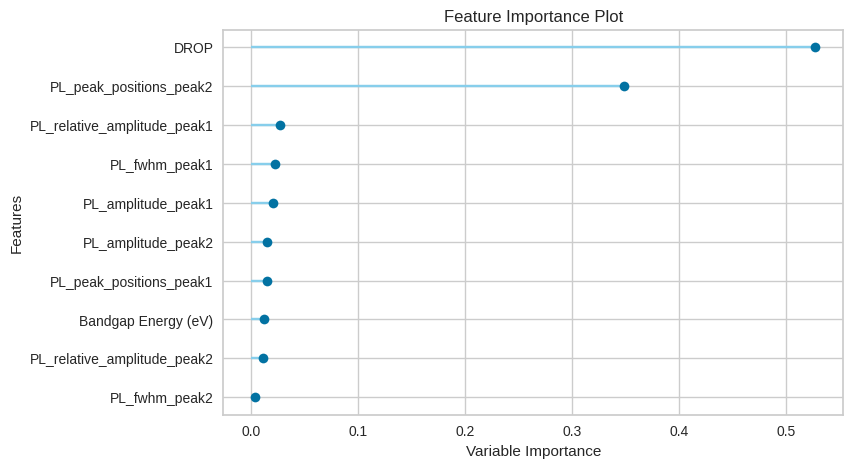

In [67]:
plot_model(gbr, plot ='feature_all')

##PL+XRD+UV

In [60]:
reg = setup(data=df , target = 'FF' ,normalize=True ,  train_size=0.8,fold=3,session_id=1543)

,Description,Value
0,Session id,1543
1,Target,FF
2,Target type,Regression
3,Original data shape,"(27, 42)"
4,Transformed data shape,"(27, 42)"
5,Transformed train set shape,"(21, 42)"
6,Transformed test set shape,"(6, 42)"
7,Numeric features,41
8,Preprocess,True
9,Imputation type,simple


In [61]:
best = compare_models(cross_validation=False)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4205,0.3058,0.5530,0.9563,0.0118,0.0094,0.1100
dt,Decision Tree Regressor,0.6857,0.9939,0.9969,0.8580,0.0232,0.0159,0.0500
xgboost,Extreme Gradient Boosting,0.7718,1.0272,1.0135,0.8532,0.0223,0.0175,0.2900
rf,Random Forest Regressor,0.9008,1.1820,1.0872,0.8311,0.0257,0.0217,0.2100
ada,AdaBoost Regressor,1.2435,1.6449,1.2825,0.7649,0.0289,0.0289,0.1400
et,Extra Trees Regressor,1.3485,1.9912,1.4111,0.7154,0.0325,0.0317,0.1500
ridge,Ridge Regression,1.2457,2.2121,1.4873,0.6839,0.0340,0.0292,0.0200
lr,Linear Regression,1.2535,2.2228,1.4909,0.6823,0.0340,0.0293,0.0400
omp,Orthogonal Matching Pursuit,1.2533,2.2264,1.4921,0.6818,0.0340,0.0293,0.0400
huber,Huber Regressor,1.4011,2.7382,1.6548,0.6087,0.0374,0.0326,0.0400


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [62]:
gbr=create_model('gbr',cross_validation = False, return_train_score=True)
evaluate_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Test,0.4205,0.3058,0.5530,0.9563,0.0118,0.0094
Train,0.1101,0.0207,0.1438,0.9960,0.0033,0.0025


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

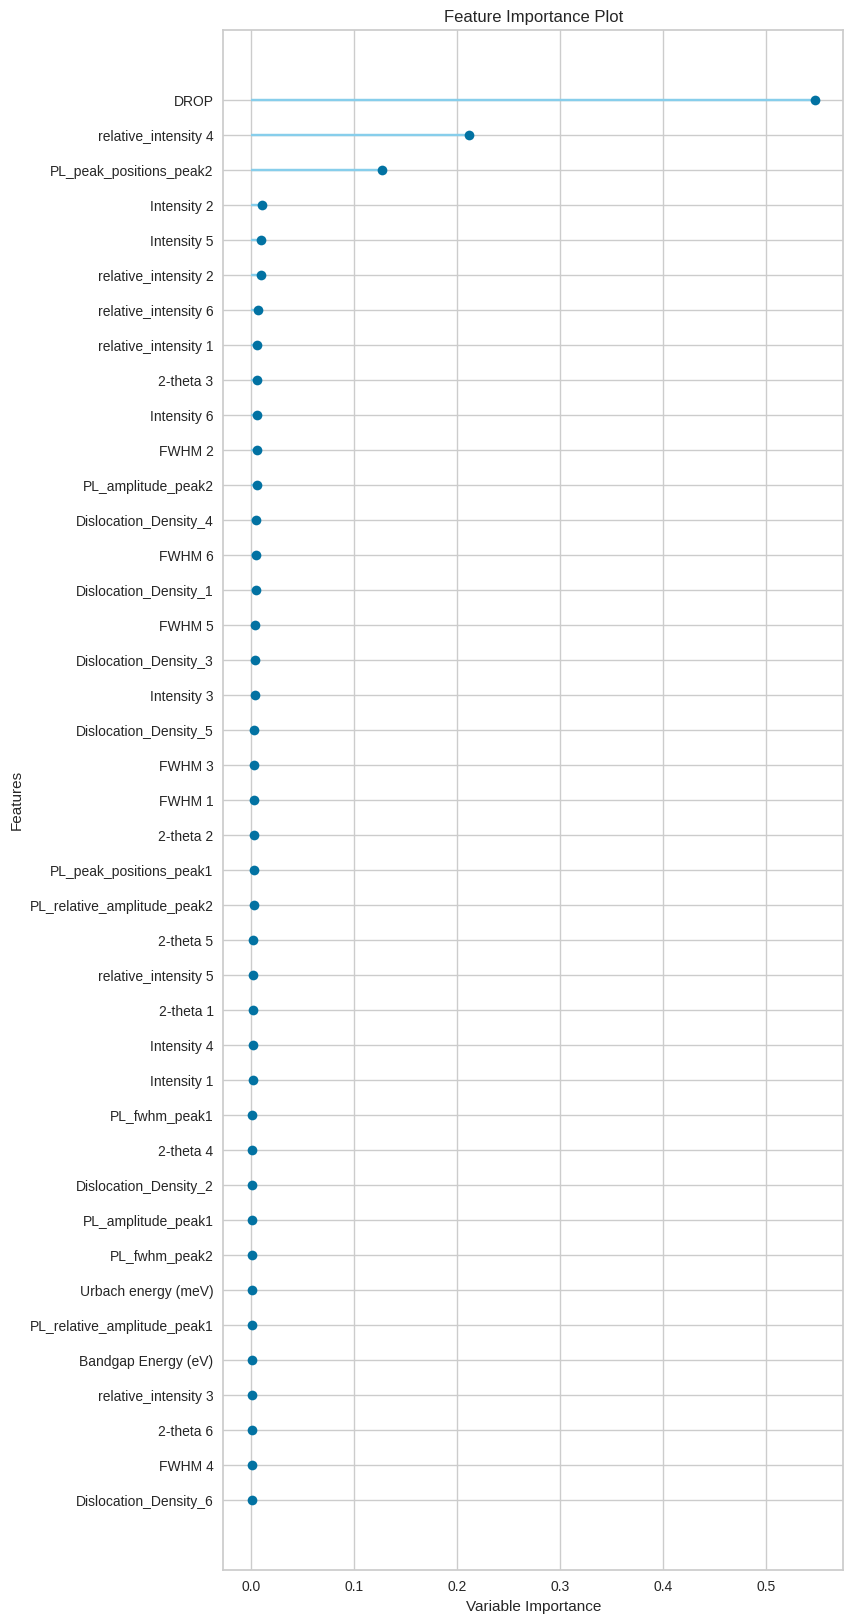

In [63]:
plot_model(gbr, plot ='feature_all')